In [45]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, plot_roc_curve, classification_report
import matplotlib.pyplot as plt

In [46]:
wta_df = pd.read_pickle('wta_cleaned_data.pkl')

In [47]:
wta_df.isna().sum()

draw_size             0
match_num             0
player_id             0
player_seed           0
player_height         0
player_age            0
best_of               0
minutes               0
ace                   0
double_fault          0
service_points_won    0
first_serve_made      0
first_serve_won       0
second_serve_won      0
serve_game            0
break_point_saved     0
break_point_faced     0
player_rank           0
player_rank_points    0
target                0
year                  0
month                 0
day                   0
french_open_2020      0
surface_carpet        0
surface_clay          0
surface_grass         0
surface_hard          0
tourney_level_c       0
tourney_level_cc      0
tourney_level_d       0
tourney_level_f       0
tourney_level_g       0
tourney_level_i       0
tourney_level_o       0
tourney_level_p       0
tourney_level_pm      0
tourney_level_t1      0
tourney_level_t2      0
tourney_level_t3      0
tourney_level_t4      0
tourney_level_t5

In [48]:
list(wta_df.columns)

['draw_size',
 'match_num',
 'player_id',
 'player_seed',
 'player_height',
 'player_age',
 'best_of',
 'minutes',
 'ace',
 'double_fault',
 'service_points_won',
 'first_serve_made',
 'first_serve_won',
 'second_serve_won',
 'serve_game',
 'break_point_saved',
 'break_point_faced',
 'player_rank',
 'player_rank_points',
 'target',
 'year',
 'month',
 'day',
 'french_open_2020',
 'surface_carpet',
 'surface_clay',
 'surface_grass',
 'surface_hard',
 'tourney_level_c',
 'tourney_level_cc',
 'tourney_level_d',
 'tourney_level_f',
 'tourney_level_g',
 'tourney_level_i',
 'tourney_level_o',
 'tourney_level_p',
 'tourney_level_pm',
 'tourney_level_t1',
 'tourney_level_t2',
 'tourney_level_t3',
 'tourney_level_t4',
 'tourney_level_t5',
 'tourney_level_w',
 'player_hand_l',
 'player_hand_r',
 'player_hand_u',
 'round_br',
 'round_f',
 'round_qf',
 'round_r128',
 'round_r16',
 'round_r32',
 'round_r64',
 'round_rr',
 'round_sf']

In [49]:
y = wta_df["target"]
X = wta_df.drop(["target"], axis=1)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
rf = RandomForestClassifier()

In [52]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [53]:
names = X.columns

In [54]:
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
             reverse=True))

Features sorted by their score:
[(0.1052, 'break_point_faced'), (0.0776, 'player_age'), (0.0739, 'player_rank_points'), (0.0712, 'player_rank'), (0.0686, 'first_serve_won'), (0.0653, 'player_id'), (0.059, 'match_num'), (0.0539, 'day'), (0.0377, 'year'), (0.0365, 'second_serve_won'), (0.0353, 'service_points_won'), (0.0319, 'player_height'), (0.0314, 'player_seed'), (0.0297, 'first_serve_made'), (0.0297, 'break_point_saved'), (0.0274, 'month'), (0.0195, 'ace'), (0.0182, 'double_fault'), (0.0144, 'draw_size'), (0.0107, 'minutes'), (0.0083, 'serve_game'), (0.0076, 'round_r32'), (0.0075, 'round_r16'), (0.0074, 'surface_hard'), (0.0069, 'surface_clay'), (0.0059, 'round_qf'), (0.0046, 'player_hand_r'), (0.0045, 'round_r64'), (0.0042, 'round_sf'), (0.004, 'surface_grass'), (0.004, 'player_hand_l'), (0.0034, 'round_r128'), (0.0033, 'tourney_level_i'), (0.0031, 'tourney_level_p'), (0.0028, 'tourney_level_t3'), (0.0027, 'tourney_level_t1'), (0.0027, 'tourney_level_g'), (0.0027, 'round_f'), (0.00

In [55]:
feature_importance = sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
             reverse=True)

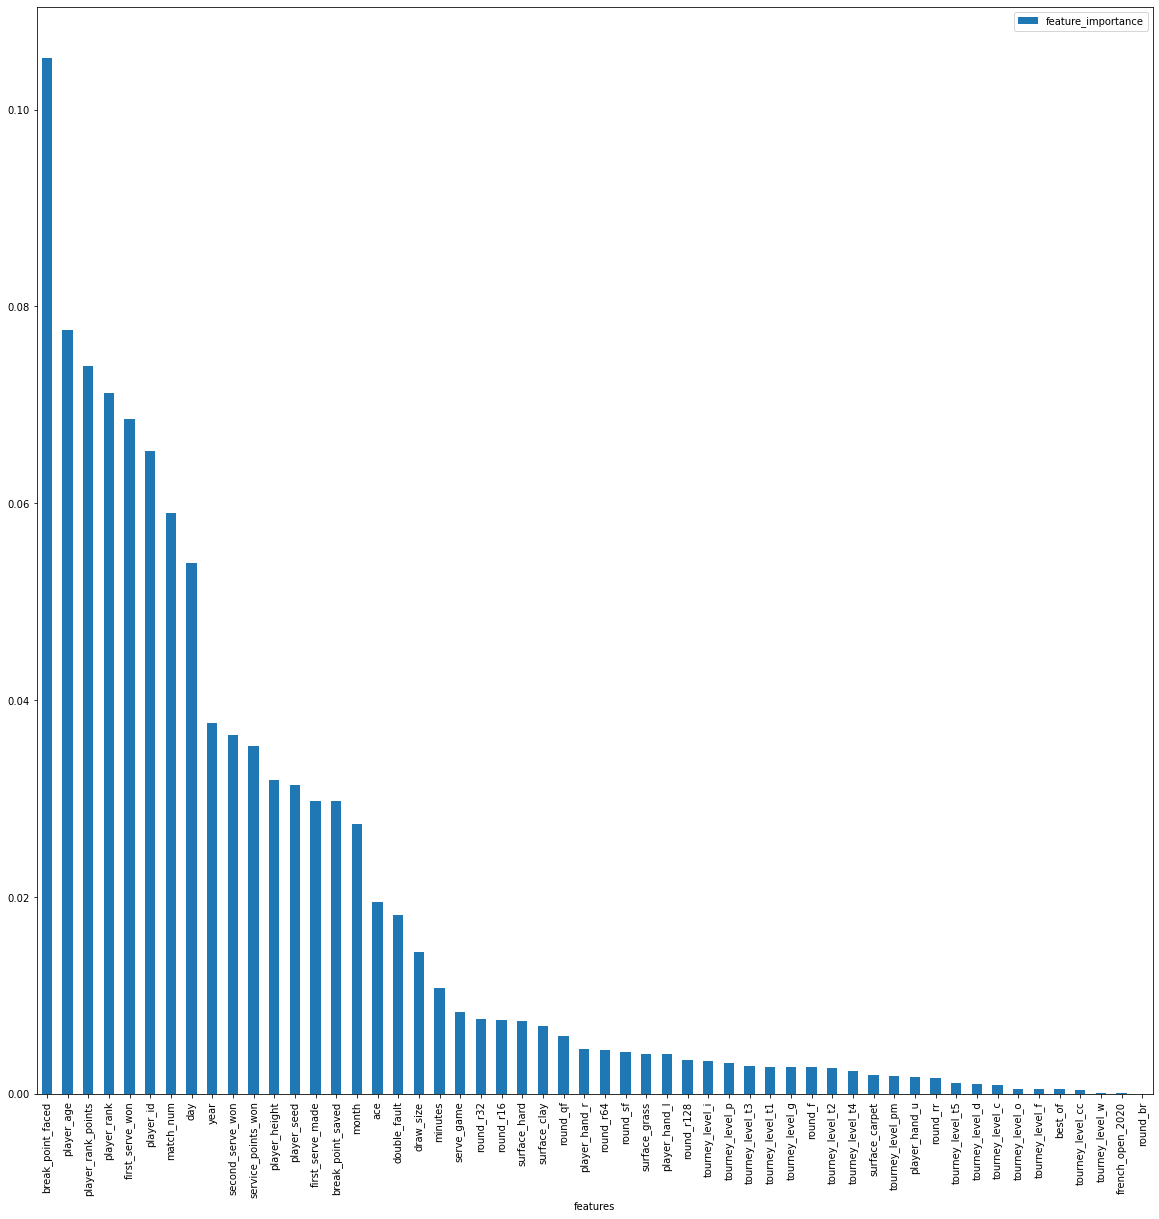

In [56]:
df = pd.DataFrame(feature_importance, columns=["feature_importance", "features"])
df.plot.bar(x="features", y = "feature_importance", figsize=(20,20))
plt.show()

In [57]:
accuracy_score(y_test, rf.predict(X_test))

0.7118218352310783

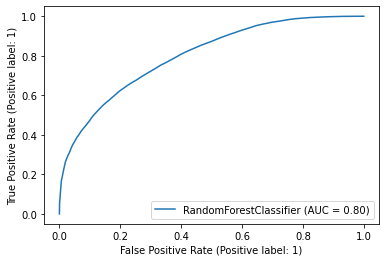

In [58]:
plot_roc_curve(rf, X_test, y_test)
plt.show()  

In [59]:
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.71      0.72      0.71     17773
           1       0.72      0.71      0.71     18059

    accuracy                           0.71     35832
   macro avg       0.71      0.71      0.71     35832
weighted avg       0.71      0.71      0.71     35832



In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

In [61]:
logreg = LogisticRegression(solver= 'liblinear')

In [62]:
logreg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [63]:
accuracy_score(y_test, logreg.predict(X_test))

0.7318039741013619

In [64]:
bg = BaggingClassifier()

In [65]:
bg.fit(X_train, y_train)

BaggingClassifier()

In [66]:
accuracy_score(y_test, bg.predict(X_test))

0.7034215226613083